# Lesson 19: Neural Networks with Keras

## Section 19.0: Import Packages and Load Data

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin
import seaborn as sns

# Use: conda install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.cross_validation as cv
import sklearn.datasets as datasets
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

Using TensorFlow backend.
/Users/dat-44pt/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Create some data (noisy cubic polynomial)
def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


## Section 19.1: Neural Network Regression

### Baseline with Linear Regression model
Let's build a baseline model to compare our NN results with.

In [3]:
lm = linear_model.LinearRegression()
lm.fit(X,y)
linear_predictions = lm.predict(X)

### Polynomial Regression
Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [4]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

# lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [5]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs=500, validation_split=0.1, 
                 batch_size=128, verbose=False)
loss.history['loss'][-1]
print("Done")

Training...
Done


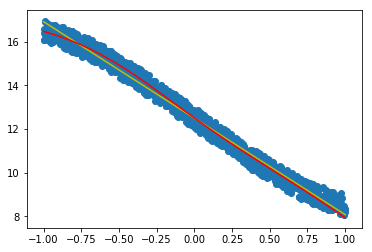

MSE 0.0921772038207


In [6]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, linear_predictions, color='y')
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression
Now, let's train our network on a sinusoid.

In [7]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


In [8]:
# Create and train baseline (linear regression) model
lm = linear_model.LinearRegression()
lm.fit(X,y)
linear_predictions = lm.predict(X)

# Create the neural net model
model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

# Set lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [9]:
# Train the model
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.0121229533189
Complete


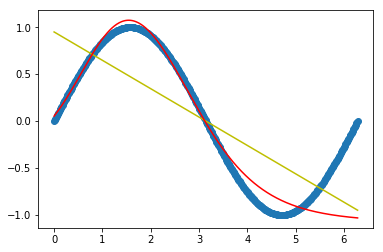

MSE 0.0650166238153


In [10]:
# Get nn model predictions
predictions = model.predict(X)

# Plot the predictions
plt.scatter(X, y)
plt.plot(X, linear_predictions, color='y')
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

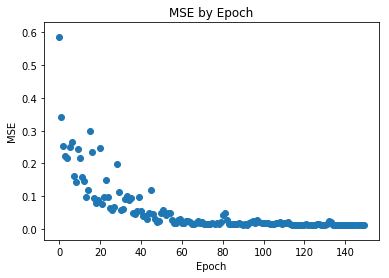

In [11]:
# Plot the error over time
plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch');

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
0.000145469724731
Complete


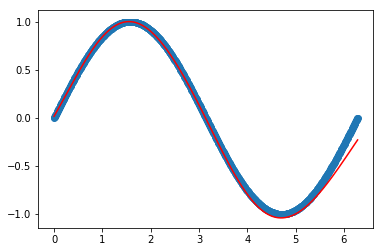

MSE 0.00335987027214


In [12]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

# Set lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs=15000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

Text(0.5,1,'MSE by Epoch')

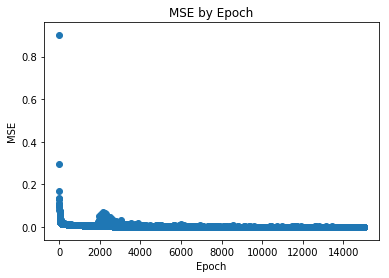

In [13]:
# Plot the error over time
plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise 19.2: Perform regression on the following data
Hints:
* Use examples from above
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [14]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


Training..
0.00283069185085
Complete


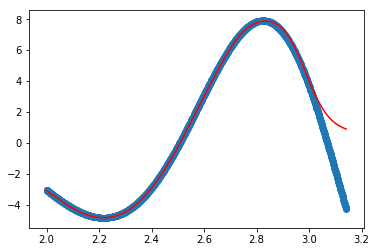

MSE 0.85505502259


In [15]:
## Solution

model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005))

print('Training..')
loss = model.fit(X, y, epochs=10000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Get models predictions
predictions = model.predict(X)

# Plot
plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Section 19.3: Classification

We'll start with the Iris dataset (of course).

In [16]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [17]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer
# output_dim = number of neurons in current layer

# First layer - input_dim=k features
model.add(Dense(input_dim=4, units=4))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y)
# Use 'softmax' for class probability or 'linear' for regression
model.add(Dense(input_dim=4, units=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [18]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=5000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.011835060179
Training complete


In [19]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

# Show prediction example
print('TRAINING SAMPLE: ' + str(X[0]))
print('PREDICTION: ' + iris.target_names[preds[0]])
print('TRUTH: ' + iris.target_names[y[0]])
print('')
print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

TRAINING SAMPLE: [ 5.1  3.5  1.4  0.2]
PREDICTION: setosa
TRUTH: setosa

ACCURACY:  0.98
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


Text(0.5,1,'MSE by Epoch')

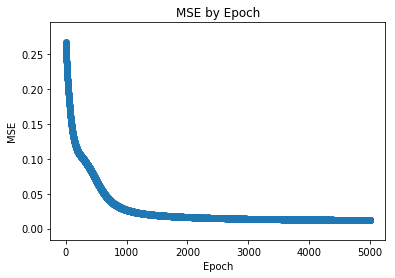

In [20]:
# Plot the error over time
plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Abalone data set

In [21]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("./datasets/abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


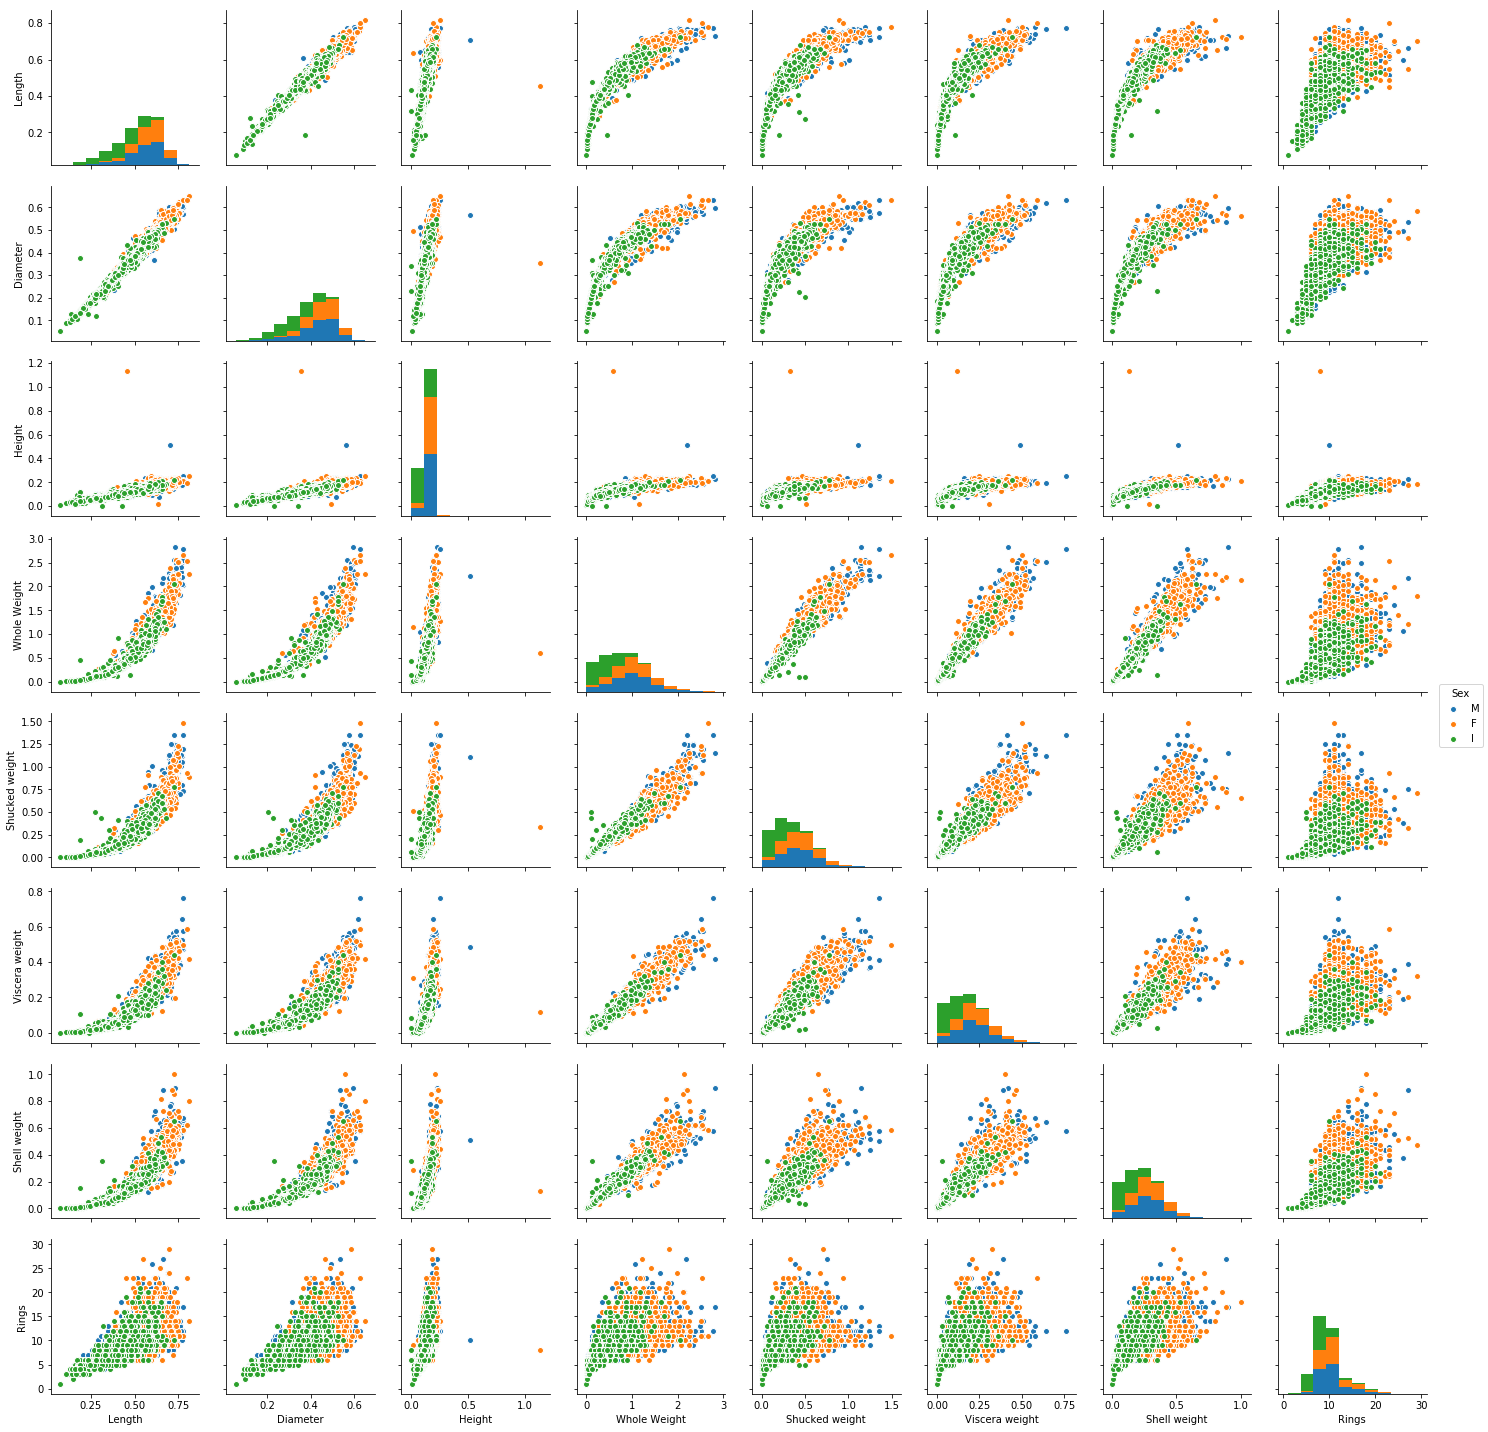

In [22]:
ax = sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show();

In [23]:
d = {'M': 0, 'F': 1, 'I': 2}
invert_d = {v: k for k, v in d.items()}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [24]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [25]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer
# output_dim = number of neurons in current layer

# First layer - input_dim=k features
model.add(Dense(input_dim=8, units=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, units=6))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y)
# Use 'softmax' for class probability or 'linear' for regression
model.add(Dense(input_dim=6, units=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [26]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=1000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.173099588229
Training complete


TRAINING SAMPLE: [  0.455    0.365    0.095    0.514    0.2245   0.101    0.15    15.    ]
PREDICTION: F
TRUTH: M

ACCURACY:  0.559013646158
CONFUSION MATRIX:
 [[ 780  470  278]
 [ 636  496  175]
 [ 181  102 1059]]


Text(0.5,1,'MSE by Epoch')

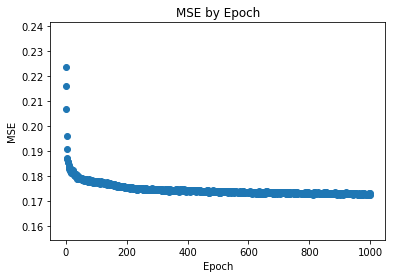

In [27]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

# Show prediction example
print('TRAINING SAMPLE: ' + str(X[0]))
print('PREDICTION: ' + invert_d[preds[0]])
print('TRUTH: ' + invert_d[y[0]])
print('')
print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time
plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise 19.4: Perform classification on the following data

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [28]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("./datasets/magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [29]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [30]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [31]:
## Define model here
model = Sequential()

# input_dim = number of neurons in previous layer
# output_dim = number of neurons in current layer

# First layer - input_dim=k features.
model.add(Dense(input_dim=10, units=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, units=6))
model.add(Activation("tanh"))

# Output layer - output_dim=# of output per point (in y)
# Use 'softmax' for class probability or 'linear' for regression
model.add(Dense(input_dim=6, units=2))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [32]:
## Train model here
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, epochs=1000, 
                 batch_size=256, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

Training...
0.107951106983
Training complete


TRAINING SAMPLE: [ 28.7967  16.0021   2.6449   0.3918   0.1982  27.7004  22.011   -8.2027
  40.092   81.8828]
PREDICTION: M
TRUTH: M

ACCURACY:  0.801104100946
CONFUSION MATRIX:
 [[11866   466]
 [ 3317  3371]]


Text(0.5,1,'MSE by Epoch')

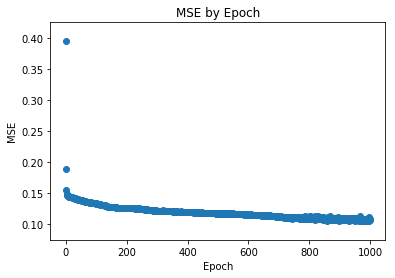

In [33]:
## Evaluate model here
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

# Show prediction example
print('TRAINING SAMPLE: ' + str(X[0]))
print('PREDICTION: ' + invert_d[preds[0]])
print('TRUTH: ' + invert_d[y[0]])
print('')
print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot error over time
plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')